In [ ]:
#python.exe -m pip install --upgrade pip (run this in your CMD first, pip has a new upgrade)
#pip install regex
#pip install python-Levenshtein
#pip install python-crfsuite

#pip install sklearn-genetic
#pip install xgboost
#pip install dataprep

#Ridewaan instructions: To run jupyter lab you type the following in the Windows Command Prompt ("jupyter-lab" or "jupyter lab"). The default location of jupyter notebooks are: C:/Users/infuser. If you are not in C:\Users\infuser> in the command prompt then you need to change your directory before you run jupyter lab e.g., cd C:\Users\infuser then when you are in C:\Users\infuser> you type "jupyter lab".
#You may want to or need to install some packages of your own (if it is not installed already). To do this, in your command prompt (windows console) you type: For example "pip install X", where X is the package name you want to install. How you know you need to install a package. For example, ModuleNotFoundError: No module named 'X', then you need to install X (as you did for your assignments) in another (new) command prompt window. For example, "pip install X". NB: you need to have another command prompt window open to install any additional packages if needed. I.e., dont stop the jupyter lab server running in the exisitng command prompt - open another command prompt to install things.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
#from dataprep.datasets import load_dataset
#from dataprep.eda import create_report
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#from genetic_selection import GeneticSelectionCV
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


In [ ]:
pd.set_option("expand_frame_repr", False)
df= pd.read_csv('UGRansome.csv')
df2 = pd.DataFrame(df)
df2.columns = ['Time','Protocol','Flag','Family','Clusters','SeedAddress','ExpAddress','BTC','USD','Netflow_Bytes','IPaddress','Threats','Port','Prediction']
df

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [ ]:
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207528,12,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1964,2986,6081,A,UDP Scan,5062,A
207529,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1968,2992,6092,A,UDP Scan,5062,A
207530,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1972,2998,6103,A,UDP Scan,5062,A
207531,8,TCP,APSF,Flyper,8,1AEoiHYZ,1SYSTEMQ,1976,3004,6114,A,UDP Scan,5062,A


In [ ]:
#Drop all duplicate rows
df2 = df2.drop_duplicates()

In [ ]:
min_time = df2['Time'].min()
print("Minimum Timestamp:", min_time)

Minimum Timestamp: -10


In [ ]:
#Extract only 2000 features from the dataset for machine learning
num_rows_to_extract = 2000

# Extract the first 2000 rows
df2 = df2.iloc[:num_rows_to_extract, :]

df2 #see below only 2000 rows

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,40,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,504,8,A,Bonet,5061,SS
1,30,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,508,7,A,Bonet,5061,SS
2,20,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,512,15,A,Bonet,5061,SS
3,57,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,516,9,A,Bonet,5061,SS
4,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,1,520,17,A,Bonet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,11,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,9,18045,5311,C,Blacklist,5066,S
1996,7,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,9,18044,5316,C,Blacklist,5066,S
1997,3,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,9,18043,5321,C,Blacklist,5066,S
1998,5,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,9,18042,5326,C,Blacklist,5066,S


In [ ]:
#Remove negative values from time feature
#Adding 11 to each value in the 'Time' column to cancel the minimum of '-10' out (above). This is often done in data manipulation
#to shift or adjust time or numerical values by a fixed amount, so that everything is positive.
df2['Time'] = df2['Time'] + 11

# -- Math transformations to reduce skewness
#Log transformation applied to column NETFLOW_BYTES
df2['Netflow_Bytes'] = np.log(df2['Netflow_Bytes']+1)

# -- Square root transformation applied to columns USD
df2['USD'] = np.sqrt(df2['USD'])

# -- Yeo Johnson transformation applied to columns BTC
#The transformation is performed using the stats.yeojohnson() function from a library like SciPy
df2['BTC'], _ = stats.yeojohnson(df2['BTC'])


In [ ]:
# TRANSFORMATIONS EXPLAINED

# --- Log transformation applied to column NETFLOW_BYTES --- #

# A log transformation involves taking the natural logarithm (base e) of each data point in a particular column or feature.
#Logarithmic transformations are often used to reduce the impact of extreme values (outliers) and make the data conform more
#closely to a normal distribution. They are particularly useful when dealing with positively skewed data,
#where the tail of the distribution is elongated on the right side.


#The np.log() function is a common way to perform a logarithmic transformation in Python.
#The + 1 added to the data points is often used to avoid issues with taking the logarithm of zero or negative values.
#It's a common practice to add a small constant like 1 to the data before applying the logarithm.

#By applying a log transformation to a feature, you're essentially compressing the range of values in that feature,
#which can help in cases where the data exhibits a rightward skew, making it more suitable for certain types of analysis
#or modeling techniques that assume normally distributed data.



# --- Square root transformation applied to columns USD ---#

#Square Root Transformation: A square root transformation involves taking the square root of each data point in the
#specified column. In this case, it's applied to the 'USD' column.

#Square root transformations are a type of mathematical transformation used to mitigate the impact of right-skewed data.
#Just like logarithmic transformations, square root transformations can help make the data more symmetric and closer to
#a normal distribution.

#The np.sqrt() function is used to calculate the square root.
#By applying a square root transformation to the 'USD' column, the code is attempting to make the data distribution less skewed
#and more suitable for certain statistical analyses or modeling techniques that assume normally distributed data or
#require data to be more symmetric. It's a common technique used in data preprocessing to improve the quality of data for
#analysis or modeling


# --- Yeo Johnson transformation applied to columns BTC--#

#Yeo-Johnson transformation is being applied to the 'BTC' column in the DataFrame (df2['BTC']).
#This transformation is used to modify the data in the 'BTC' column to make its distribution more normalized or symmetric
#The Yeo-Johnson transformation is a mathematical transformation technique used to modify the distribution of data.
#It can be applied to both positive and negative values and is more versatile than some other transformations like the Box-Cox transformation.


# --- Box-Cox Transformation --- #

# from scipy.stats import boxcox
# Assuming 'data' is your dataset and 'column_name' is the column to transform
# transformed_data, lambda_value = boxcox(data['column_name'])

# --- Exponential Transformation --- #

# Assuming 'data' is your dataset and 'column_name' is the column to transform
# exponential_transformed_data = data['column_name'].apply(lambda x: x**2)  # Replace 2 with the desired exponent

# --- Power Transformation --- #

# Assuming 'data' is your dataset and 'column_name' is the column to transform
# power_transformed_data = data['column_name'].apply(lambda x: x**1.5)  # Replace 1.5 with the desired power

# --- Quantile Transformation (using sklearn) --- #

# from sklearn.preprocessing import QuantileTransformer
# Assuming 'data' is your dataset and 'column_name' is the column to transform
# transformer = QuantileTransformer(output_distribution='normal')
# quantile_transformed_data = transformer.fit_transform(data[['column_name']])

# --- Winsorization (using scipy) --- #

# from scipy.stats.mstats import winsorize
# Assuming 'data' is your dataset and 'column_name' is the column to winsorize
# winsorized_data = winsorize(data['column_name'], limits=[0.05, 0.95])  # Replace limits as needed

# --- Rank Transformation --- #

# Assuming 'data' is your dataset and 'column_name' is the column to transform
# rank_transformed_data = data['column_name'].rank()

# --- PCA (Principal Component Analysis) Transformation (using sklearn) --- #

# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# Assuming 'data' is your dataset and 'features' are the columns for PCA
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(data[features])
# pca = PCA(n_components=3)  # Specify the number of components
# pca_transformed_data = pca.fit_transform(scaled_data)


In [ ]:
# --- Dropping Columns --- #

# Assuming 'df' is your DataFrame and 'columns_to_remove' is a list of column names to remove
#columns_to_remove = ['Column1', 'Column2', 'Column3']  # Replace with your column names

# Remove the specified columns
#df.drop(columns=columns_to_remove_name, inplace=True)


# --- Replacing Cells --- #

# Replace missing values with the mean of the column
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Creating a new feature by combining existing ones
#df['interaction_feature'] = df['feature1'] * df['feature2']


# Example DataFrame
#data = {'A': [1, 2, 3],
#        'B': [4, 5, 6],
#        'C': [7, 8, 9]}
#df = pd.DataFrame(data)

# Replace a specific cell with NaN
#df.loc[2, 'A'] = pd.NA


# Replace a specific cell with an empty string
#df.loc[1, 'B'] = ''

In [ ]:
# KUTOSIS

#Kurtosis is a statistical measure that describes the shape, or the "tailedness," of a probability distribution. It quantifies the heaviness of the tails of a distribution relative to a normal distribution. A higher kurtosis indicates heavier tails compared to a normal distribution, while lower kurtosis indicates lighter tails.
#Kurtosis value for a normal distribution is 0. Positive values indicate heavier tails than a normal distribution, while negative values indicate lighter tails.

#from scipy.stats import kurtosis
# Generate a random dataset
#data = np.random.normal(0, 1, 1000)  # Generating 1000 random samples from a normal distribution
# Calculate the kurtosis
#data_kurtosis = kurtosis(data)
#print("Kurtosis of the dataset:", data_kurtosis)

In [ ]:
# SCALING TECHNIQUES

#Normalizing features typically involves scaling numerical features to a standard range, often between 0 and 1 or with a mean of 0 and a standard deviation of 1.

# --- Min-Max Scaling --- #

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df['scaled_column'] = scaler.fit_transform(df[['numeric_column']])
#scales features to a specified range, commonly between 0 and 1. Adjust the range by specifying feature_range=(min_value, max_value) in the MinMaxScaler if needed.


# --- Standardization (Z-score scaling) --- #

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df['standardized_column'] = scaler.fit_transform(df[['numeric_column']])
#scales features to have a mean of 0 and a standard deviation of 1. This method assumes your data follows a normal distribution or is approximately normally distributed.


# --- Robust Scaling --- #

#from sklearn.preprocessing import RobustScaler
# Assuming 'X' is your feature matrix
#scaler = RobustScaler()
#robust_scaled_features = scaler.fit_transform(X)
#The RobustScaler is robust to outliers, scaling features based on median and interquartile range, which can be more suitable for data with outliers.


# --- Normalizer --- #

#from sklearn.preprocessing import Normalizer
# Assuming 'X' is your feature matrix
#scaler = Normalizer()
#normalized_features = scaler.fit_transform(X)
#The Normalizer scales each sample (row) to have a unit norm (e.g., L1 or L2 norm). This normalization is performed across the features for each sample independently.


In [ ]:
#The threat Bonet should be renamed to "Botnet"
df2['Threats'] = df2['Threats'].replace('Bonet', 'Botnet')

#If you want to do this operation only for specific rows meeting certain conditions, you can combine it with boolean indexing.
#For example, if you only want to replace 'Bonet' in rows where the 'Severity' column equals 'High':
#df.loc[df['Severity'] == 'High', 'Threat'] = df.loc[df['Severity'] == 'High', 'Threat'].replace('Bonet', 'Botnet')

df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.449944,2.197225,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.538855,2.079442,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.627417,2.772589,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.715633,2.302585,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.803509,2.890372,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,22,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.331679,8.577724,C,Blacklist,5066,S
1996,18,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.327957,8.578665,C,Blacklist,5066,S
1997,14,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.324235,8.579604,C,Blacklist,5066,S
1998,16,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.320512,8.580544,C,Blacklist,5066,S


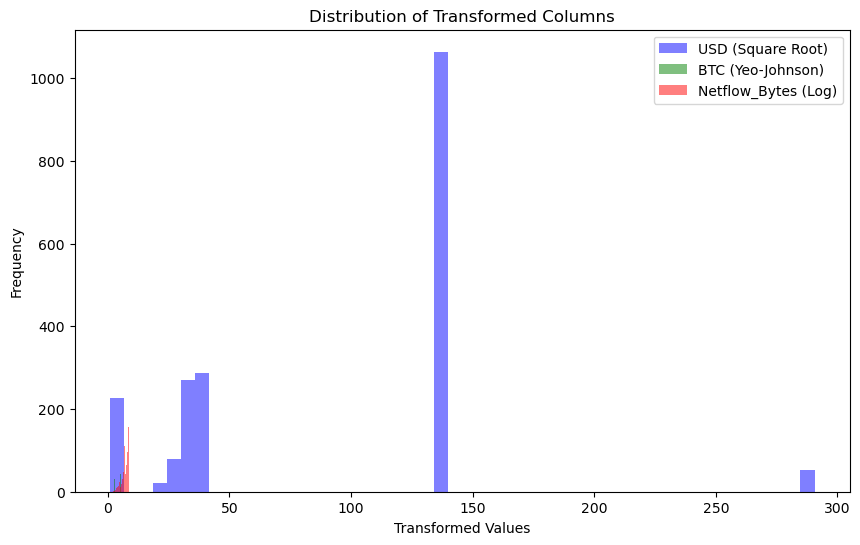

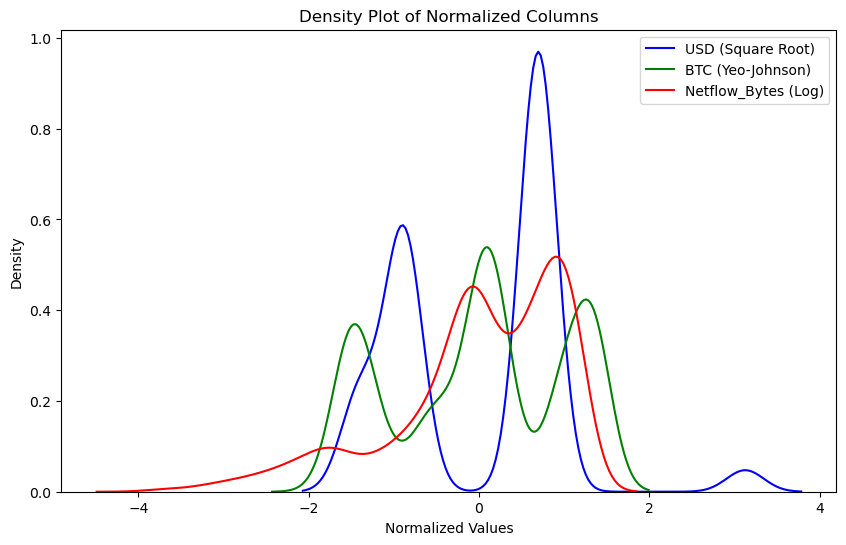

In [ ]:
# PLOTING TRANSFORMED DATA

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the transformed 'USD' column
ax.hist(df2['USD'], bins=50, alpha=0.5, color='blue', label='USD (Square Root)')

# Plot the transformed 'BTC' column
ax.hist(df2['BTC'], bins=50, alpha=0.5, color='green', label='BTC (Yeo-Johnson)')

# Plot the transformed 'Netflow_Bytes' column
ax.hist(df2['Netflow_Bytes'], bins=50, alpha=0.5, color='red', label='Netflow_Bytes (Log)')

# Add labels and a legend
ax.set_xlabel('Transformed Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Transformed Columns')
ax.legend()

# Show the plot
plt.show()

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a StandardScaler instance
#It is used to standardize or normalize the features of a dataset by scaling them such that they have a mean of 0 and a standard
#deviation of 1.

scaler = StandardScaler()

# Normalize each column's features
df2_normalized = df2.copy()
df2_normalized[['USD', 'BTC', 'Netflow_Bytes']] = scaler.fit_transform(df2[['USD', 'BTC', 'Netflow_Bytes']])

# Plot the density of the normalized 'USD' column
sns.kdeplot(df2_normalized['USD'], color='blue', label='USD (Square Root)', ax=ax)

# Plot the density of the normalized 'BTC' column
sns.kdeplot(df2_normalized['BTC'], color='green', label='BTC (Yeo-Johnson)', ax=ax)

# Plot the density of the normalized 'Netflow_Bytes' column
sns.kdeplot(df2_normalized['Netflow_Bytes'], color='red', label='Netflow_Bytes (Log)', ax=ax)

# Add labels and a legend
ax.set_xlabel('Normalized Values')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Normalized Columns')
ax.legend()

# Show the plot
plt.show()


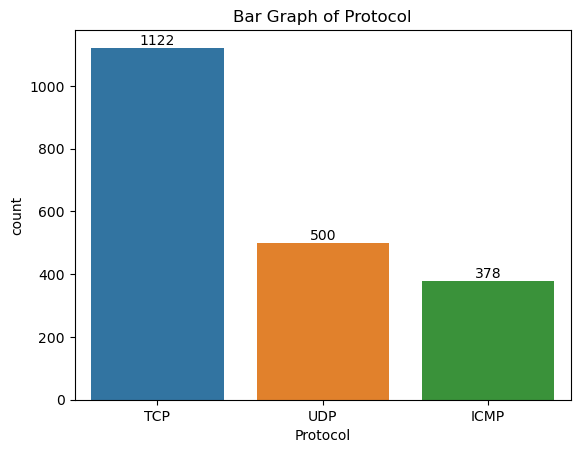

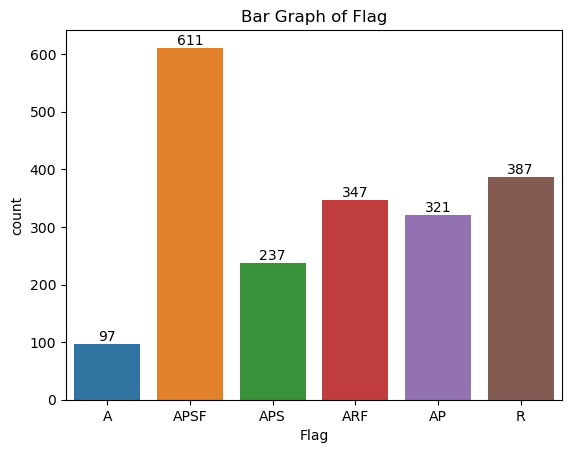

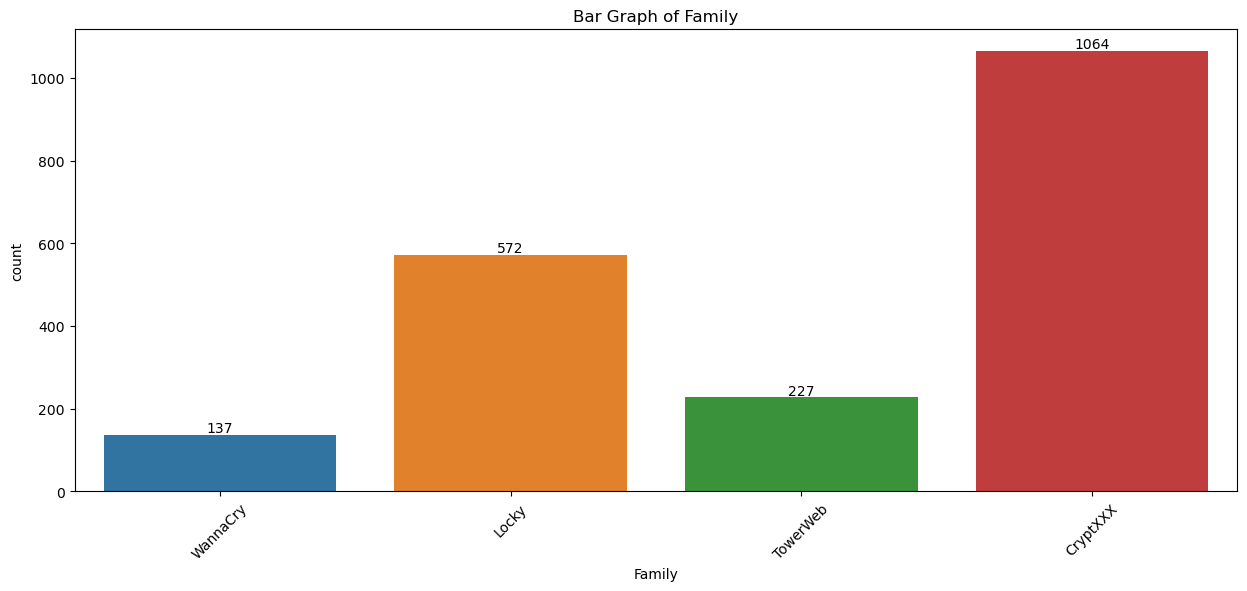

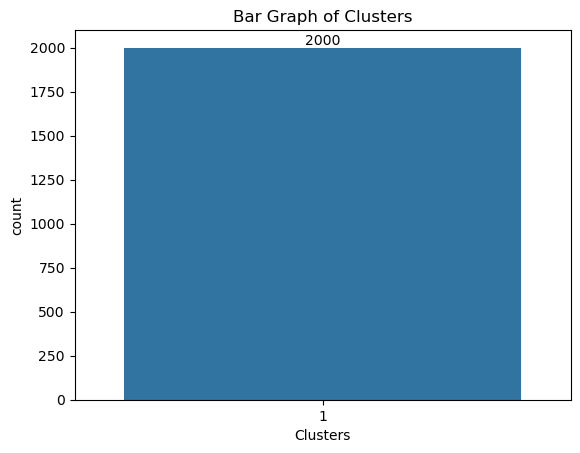

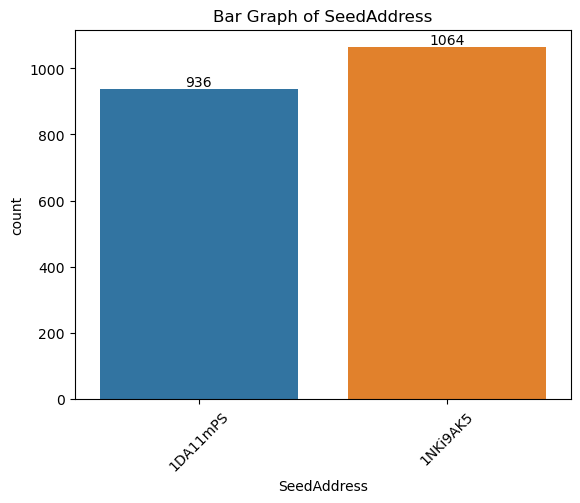

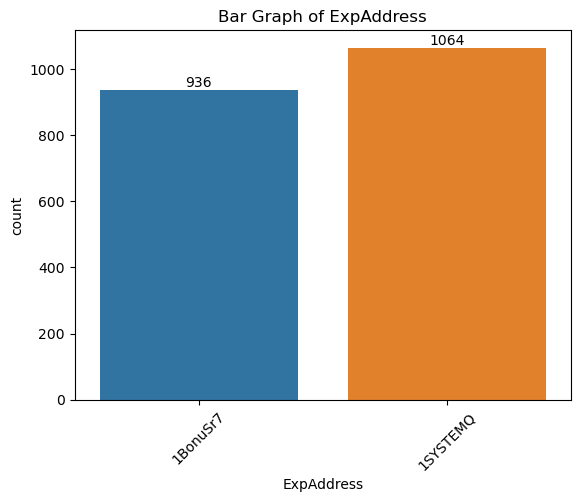

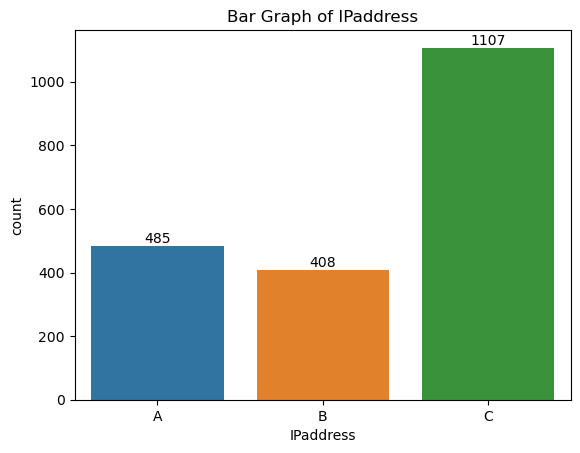

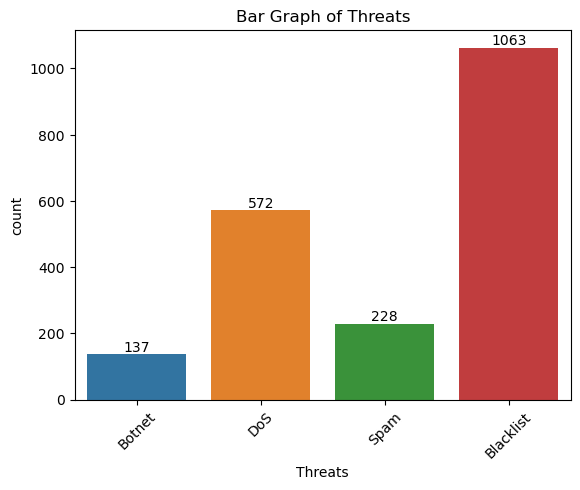

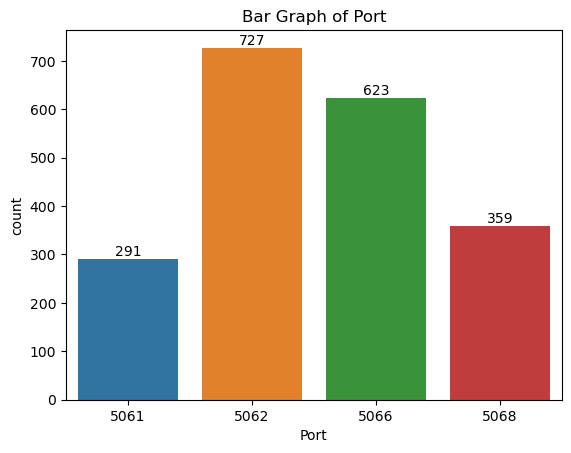

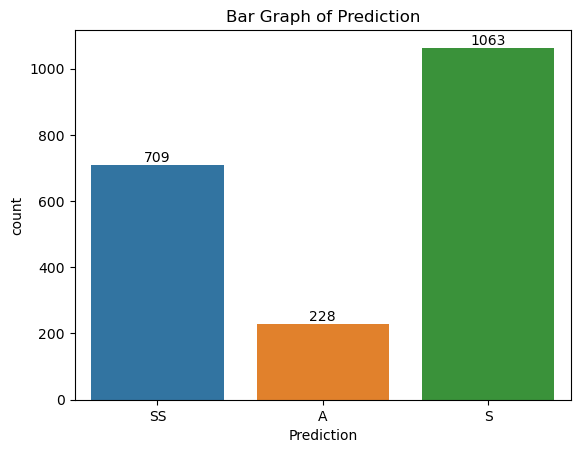

In [ ]:
# Phase 3: Data Visualization

# Count visualizations
# Categorical count visualizations
# Protocol count

ax = sns.countplot(x=df2['Protocol'], data=df2)
plt.title('Bar Graph of Protocol')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Flag count

ax = sns.countplot(x=df2['Flag'], data=df2)
plt.title('Bar Graph of Flag')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Family count

plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df2['Family'], data=df2)
plt.title('Bar Graph of Family')
plt.xticks(rotation=45)
plt.xticks(fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Clusters count

ax = sns.countplot(x=df2['Clusters'], data=df2)
plt.title('Bar Graph of Clusters')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# SeedAddress count

ax = sns.countplot(x=df2['SeedAddress'], data=df2)
plt.title('Bar Graph of SeedAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# ExpAddress count

ax = sns.countplot(x=df2['ExpAddress'], data=df2)
plt.title('Bar Graph of ExpAddress')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# IPaddress count

ax = sns.countplot(x=df2['IPaddress'], data=df2)
plt.title('Bar Graph of IPaddress')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Threats count

ax = sns.countplot(x=df2['Threats'], data=df2)
plt.title('Bar Graph of Threats')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Port count

ax = sns.countplot(x=df2['Port'], data=df2)
plt.title('Bar Graph of Port')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Prediction count

ax = sns.countplot(x=df2['Prediction'], data=df2)
plt.title('Bar Graph of Prediction')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

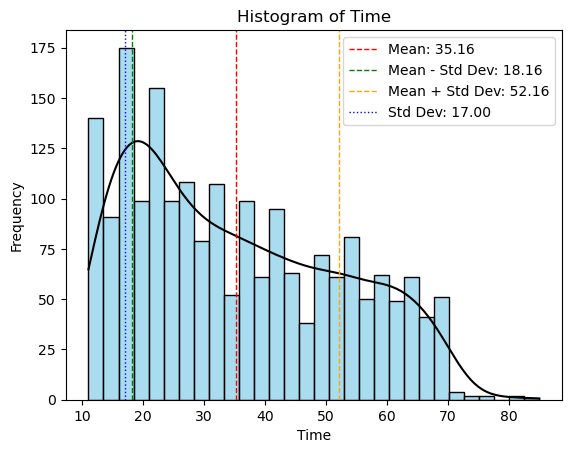

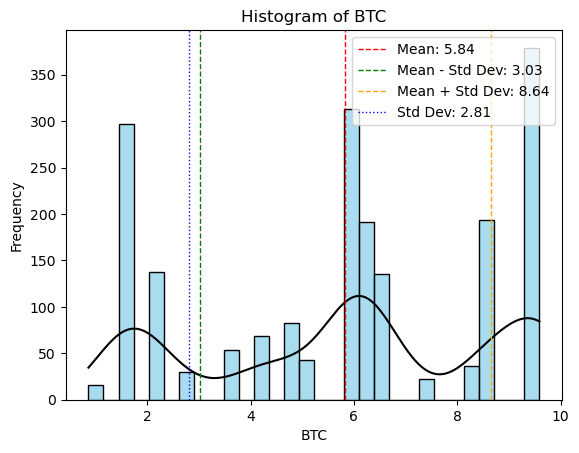

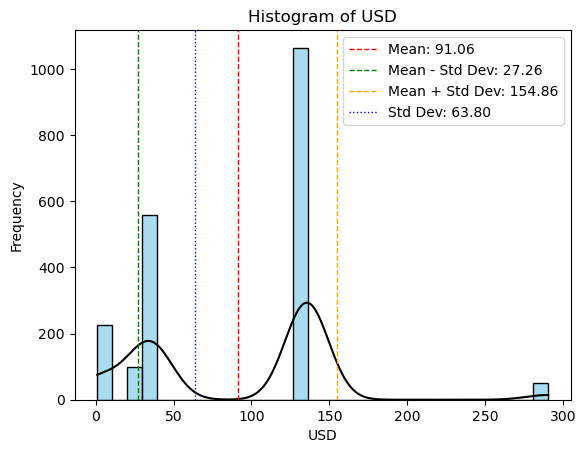

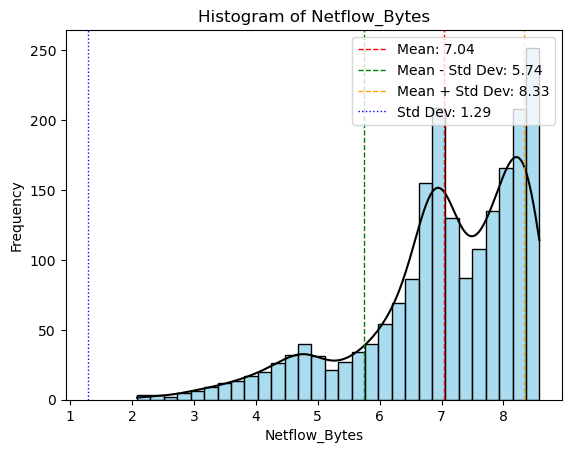

In [ ]:
# Numeric visualizations (count, mean and standard deviation)

# Time

feature = 'Time'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# # BTC

feature = 'BTC'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# # USD

feature = 'USD'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

# Netflow_Bytes

feature = 'Netflow_Bytes'
data = df2[feature]
mean = np.mean(data)
std_dev = np.std(data)

ax = sns.histplot(data, bins=30, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
ax.lines[0].set_color('black')

plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=1, label=f'Mean - Std Dev: {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + Std Dev: {mean + std_dev:.2f}')
plt.axvline(std_dev, color='blue', linestyle='dotted', linewidth=1, label=f'Std Dev: {std_dev:.2f}')

plt.legend(loc='upper right')

plt.title(f'Histogram of {feature}')
plt.xlabel(feature)
plt.ylabel('Frequency')
plt.show()

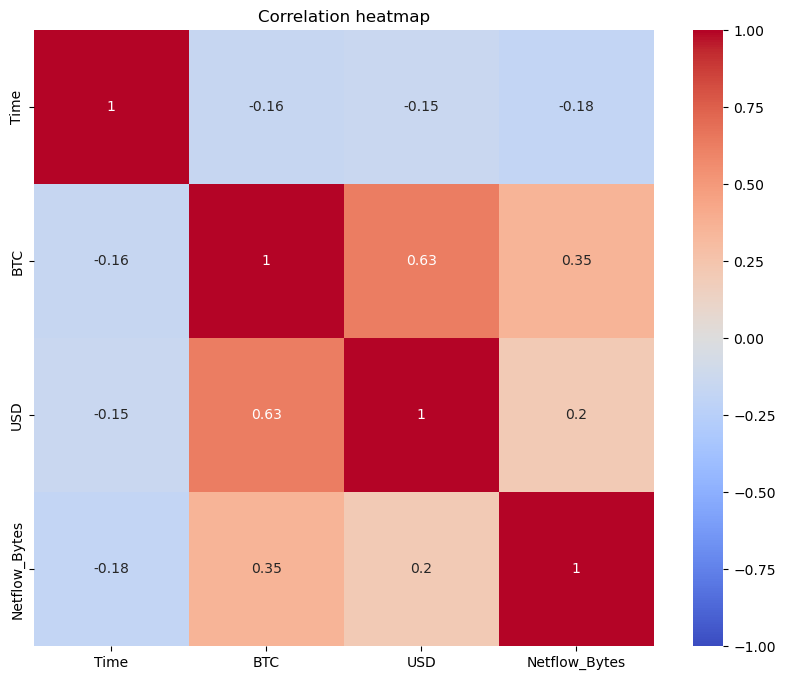

In [ ]:
# Phase 4: Applied Statistical Analysis

# --- Correlations --- #
# Correlation matrix

c_matrix = df2[['Time', 'BTC', 'USD', 'Netflow_Bytes']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(c_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
# --- Summary Statistics --- #

# Count, Mean, and Standard Deviation Summary of numerical features
df2[['Time', 'BTC', 'USD', 'Netflow_Bytes']].describe()

,Time,BTC,USD,Netflow_Bytes
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,35.161000,5.837652,91.060738,7.037558
std,17.001547,2.806845,63.813572,1.293933
min,11.000000,0.864818,1.000000,2.079442
25%,20.000000,3.761710,34.402033,6.510258
50%,32.000000,5.883914,134.746057,7.150307
75%,49.000000,8.662491,135.845500,8.099630
max,85.000000,9.588001,290.599381,8.581482


In [ ]:
df2.head()

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.449944,2.197225,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.538855,2.079442,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.627417,2.772589,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.715633,2.302585,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.803509,2.890372,A,Botnet,5061,SS


In [ ]:
df2.tail()

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
1995,22,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.331679,8.577724,C,Blacklist,5066,S
1996,18,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.327957,8.578665,C,Blacklist,5066,S
1997,14,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.324235,8.579604,C,Blacklist,5066,S
1998,16,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.320512,8.580544,C,Blacklist,5066,S
1999,12,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.316790,8.581482,C,Blacklist,5066,S


In [ ]:
df2.median()

Time               32.000000
Clusters            1.000000
BTC                 5.883914
USD               134.746057
Netflow_Bytes       7.150307
Port             5062.000000
dtype: float64

In [ ]:
df2.describe()

,Time,Clusters,BTC,USD,Netflow_Bytes,Port
count,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000
mean,35.161000,1.0,5.837652,91.060738,7.037558,5064.177500
std,17.001547,0.0,2.806845,63.813572,1.293933,2.617904
min,11.000000,1.0,0.864818,1.000000,2.079442,5061.000000
25%,20.000000,1.0,3.761710,34.402033,6.510258,5062.000000
50%,32.000000,1.0,5.883914,134.746057,7.150307,5062.000000
75%,49.000000,1.0,8.662491,135.845500,8.099630,5066.000000
max,85.000000,1.0,9.588001,290.599381,8.581482,5068.000000


In [ ]:
df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.449944,2.197225,A,Botnet,5061,SS
1,41,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.538855,2.079442,A,Botnet,5061,SS
2,31,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.627417,2.772589,A,Botnet,5061,SS
3,68,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.715633,2.302585,A,Botnet,5061,SS
4,52,TCP,A,WannaCry,1,1DA11mPS,1BonuSr7,0.864818,22.803509,2.890372,A,Botnet,5061,SS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,22,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.331679,8.577724,C,Blacklist,5066,S
1996,18,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.327957,8.578665,C,Blacklist,5066,S
1997,14,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.324235,8.579604,C,Blacklist,5066,S
1998,16,TCP,R,CryptXXX,1,1NKi9AK5,1SYSTEMQ,5.085876,134.320512,8.580544,C,Blacklist,5066,S


In [ ]:
#Transform categorical variables into numerical values.

lab_encoder = preprocessing.LabelEncoder()
df2['Protocol'] = lab_encoder.fit_transform(df2['Protocol'])
df2['Flag'] = lab_encoder.fit_transform(df2['Flag'])
df2['Family'] = lab_encoder.fit_transform(df2['Family'])

df2['SeedAddress'] = lab_encoder.fit_transform(df2['SeedAddress'])
df2['ExpAddress'] = lab_encoder.fit_transform(df2['ExpAddress'])
df2['IPaddress'] = lab_encoder.fit_transform(df2['IPaddress'])
df2['Threats'] = lab_encoder.fit_transform(df2['Threats'])
df2['Prediction'] = lab_encoder.fit_transform(df2['Prediction'])

df2

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port,Prediction
0,51,1,0,3,1,0,0,0.864818,22.449944,2.197225,0,1,5061,2
1,41,1,0,3,1,0,0,0.864818,22.538855,2.079442,0,1,5061,2
2,31,1,0,3,1,0,0,0.864818,22.627417,2.772589,0,1,5061,2
3,68,1,0,3,1,0,0,0.864818,22.715633,2.302585,0,1,5061,2
4,52,1,0,3,1,0,0,0.864818,22.803509,2.890372,0,1,5061,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,22,1,5,0,1,1,1,5.085876,134.331679,8.577724,2,0,5066,1
1996,18,1,5,0,1,1,1,5.085876,134.327957,8.578665,2,0,5066,1
1997,14,1,5,0,1,1,1,5.085876,134.324235,8.579604,2,0,5066,1
1998,16,1,5,0,1,1,1,5.085876,134.320512,8.580544,2,0,5066,1


In [ ]:
# --- Training & Testing --- #

#Divides it into training data (X_train and y_train) used to train the model and
#testing data (X_test and y_test) used to evaluate the model's performance.


X = df2.iloc[:, :-1] #This line selects all rows and all columns of the DataFrame df2 except for the last column.
#It's assuming that the last column contains the target variable or labels, and X will contain all the feature columns

y = df2.iloc[:, -1]  # This line selects all rows but only the last column of the DataFrame df2.
#This is to isolate the target variable or labels, and y will contain these labels.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)  #split test and train into 4 parts
#This line uses the train_test_split function to split the data into training and testing sets.
#Here's a breakdown of the parameters:

#X and y: The feature matrix and target variable.
#train_size=0.8: This parameter specifies that 80% of the data should be used for training. 20% would be test data.
#(you can adjust this percentage as needed).
#random_state=42: This parameter sets the random seed for reproducibility, ensuring that the split is the same each time you
#run the code.


#After running this code, you will have:

#X_train: The feature matrix for training.
#X_test: The feature matrix for testing.
#y_train: The target variable for training.
#y_test: The target variable for testing.
#These subsets can then be used for training and evaluating your machine learning models.


In [ ]:
X_train

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
968,66,1,4,0,1,1,1,6.632278,135.845500,5.176150,0,0,5066
240,18,1,3,1,1,0,0,6.263620,33.376639,5.762051,1,2,5068
819,64,1,2,2,1,0,0,3.761710,1.000000,7.921173,2,3,5066
692,56,1,3,1,1,0,0,1.571083,39.395431,6.740519,1,2,5066
420,55,1,3,1,1,0,0,2.190759,35.777088,6.754604,2,2,5068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,22,2,4,0,1,1,1,5.883914,135.845500,6.894670,0,0,5061
1294,33,2,1,0,1,1,1,5.883914,135.845500,7.499423,2,0,5062
860,65,1,2,2,1,0,0,4.223694,1.000000,8.193124,2,3,5066
1459,22,2,1,0,1,1,1,8.662491,135.845500,7.875499,2,0,5062


In [ ]:
X_test

,Time,Protocol,Flag,Family,Clusters,SeedAddress,ExpAddress,BTC,USD,Netflow_Bytes,IPaddress,Threats,Port
1860,12,0,5,0,1,1,1,9.588001,134.833230,8.441823,2,0,5066
353,28,1,3,1,1,0,0,6.263620,34.785054,6.487684,1,2,5068
1333,18,2,1,0,1,1,1,5.883914,135.845500,7.601902,2,0,5062
905,25,1,2,2,1,0,0,4.223694,1.000000,8.425297,2,3,5066
1289,23,2,4,0,1,1,1,5.883914,135.845500,7.485492,2,0,5062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,57,1,4,0,1,1,1,6.632278,135.845500,5.087596,0,0,5066
1284,17,2,4,0,1,1,1,5.883914,135.845500,7.471363,2,0,5062
1739,19,0,5,0,1,1,1,9.588001,135.281189,8.302018,2,0,5062
261,39,1,3,1,1,0,0,6.263620,33.585711,5.942799,1,2,5068


In [ ]:
y_train #will just be prediction column as your target variable

968     1
240     2
819     0
692     2
420     2
       ..
1130    1
1294    1
860     0
1459    1
1126    1
Name: Prediction, Length: 1600, dtype: int32

In [ ]:
y_test #will just be prediction column as your target variable

1860    1
353     2
1333    1
905     0
1289    1
       ..
965     1
1284    1
1739    1
261     2
535     2
Name: Prediction, Length: 400, dtype: int32

In [ ]:
pip install sklearn-genetic #run this in your cmd
# Imported models at the top: ensemble, random forest, SVM, Naive Bayes, genetic algorithm
# Imported evaluation metrics at the top: accuracy, precision, recall, f1 score

SyntaxError: invalid syntax (3175713245.py, line 1)

In [ ]:
# --- EXPLANATION of how to look at the algorithms using Random Forest as example --- #

rf = RandomForestClassifier(n_estimators=100, random_state=42) #  It specifies the number of trees in the Random Forest.
#In this case, there are 100 trees in the forest

#n_estimators: the amount of features
# random_state: This parameter is used to set the random seed for reproducibility.
#By setting it to 42, the randomization process will be the same each time the code is run, ensuring consistent results for the Random Forest model.

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf_pred=rf.predict(X_test)

#This code snippet uses the trained Random Forest classifier (rf) to make predictions on the test data (X_test).
#The predict method takes the test features in X_test as input and produces predicted labels for these features.
#The predictions are stored in the rf_pred variable, which can be used for further evaluation or analysis to assess how well
#the model performs on unseen data.

In [ ]:
rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)


#The accuracy_score function from scikit-learn is used to calculate the accuracy of the model's predictions (rf_pred)
#compared to the actual labels (y_test). This score measures the proportion of correctly classified instances.
#classification_report: The classification_report function generates a comprehensive report that includes precision, recall,
#F1-score, and support for each class in the classification problem. It provides detailed insights into the model's
#performance for different classes.
#confusion_matrix: The confusion_matrix function computes a confusion matrix that summarizes the true positive, true negative,
#false positive, and false negative counts for the classification results. It helps in understanding how well the model is
#performing and where it might be making errors.

#Finally, the code prints out the accuracy, classification report, and confusion matrix for the Random Forest model,
#allowing you to evaluate its performance on the test data.

In [ ]:
# EXPLANATION OF THE ABOVE CONFUSION MATRIX

# Support refers to the number of actual occurrences of each class in your dataset.
# In the classification report:
#     #Precision# measures the accuracy of the positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positive observations.
#     #Recall# (also called sensitivity or true positive rate) measures the proportion of actual positive cases that were correctly predicted.
#     #F1-score# is the harmonic mean of precision and recall. It provides a balance between precision and recall.

# In the confusion matrix:
#   [[ 39   0   0]
#    [  0 213   0]
#    [  0   0 148]]
#     Each row represents the actual class, and each column represents the predicted class.
#     The diagonal elements represent the number of correctly classified instances for each class.
#     Off-diagonal elements are misclassifications. For instance, in a binary classification problem, they represent false positives and false negatives.

# In your specific example:
#     For each class (0, 1, 2), the model achieved perfect precision, recall, and F1-score of 1.0, which means it accurately classified all instances of each class.
#     The "support" column in the classification report shows the actual number of occurrences of each class in your dataset (39, 213, 148 for classes 0, 1, and 2, respectively).
#     The confusion matrix further confirms that the model made no errors in classification (diagonal elements are populated while off-diagonal elements are all zeros), achieving 100% accuracy.


In [ ]:
# THE FOLLOWING ALGORITHMS ARE GIVEN AS OPTIONS TO USE

# Random Forest
# XGBoost
# Extra Trees
# Decision Tree
# Support Vector Machine (SVM)
# Linear Support Vector Machine (SVM)
# Gradient Boosting
# K-Nearest Neighbors
# Logistic Regression
# Neural Networks
# Naive Bayes Algorithm

#Ensemble Learning


Accuracy of Random Forest :  1.0
Classification report of Random Forest : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Random Forest : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


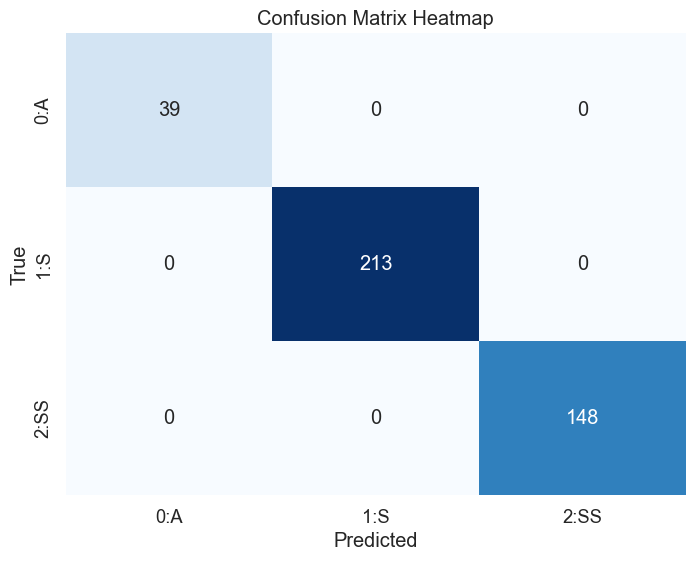

In [ ]:
# --- 1. Random Forest --- #

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)

rf_accuracy = accuracy_score(rf_pred, y_test)
rf_report = classification_report(rf_pred, y_test)
rf_matrix = confusion_matrix(rf_pred, y_test)
print('Accuracy of Random Forest : ', round(rf_accuracy, 3))
print('Classification report of Random Forest : \n', rf_report)
print('Confusion Matrix of Random Forest : \n', rf_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(rf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of XGBoost:  1.0
Classification report of XGBoost: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of XGBoost: 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


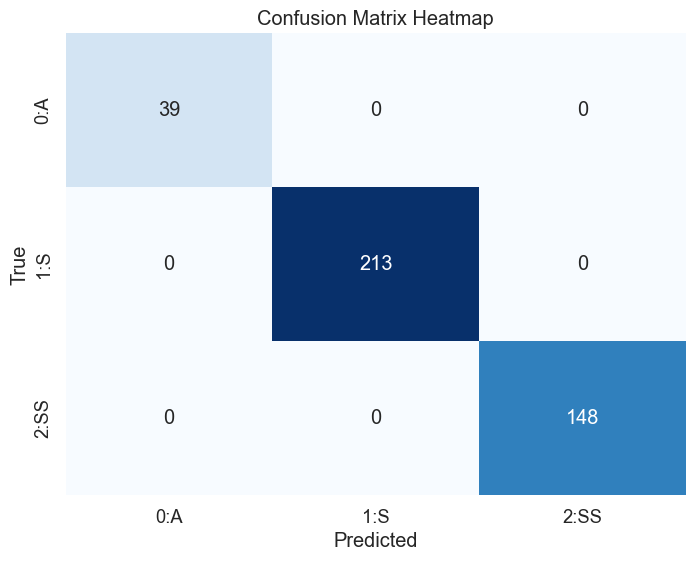

In [ ]:
# --- 2. XGBoost --- #

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(xgb_pred, y_test)
xgb_report = classification_report(xgb_pred, y_test)
xgb_matrix = confusion_matrix(xgb_pred, y_test)
print('Accuracy of XGBoost: ', round(xgb_accuracy, 3))
print('Classification report of XGBoost: \n', xgb_report)
print('Confusion Matrix of XGBoost: \n', xgb_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(xgb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Extra Trees :  1.0
Classification report of Extra Trees : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Extra Trees : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


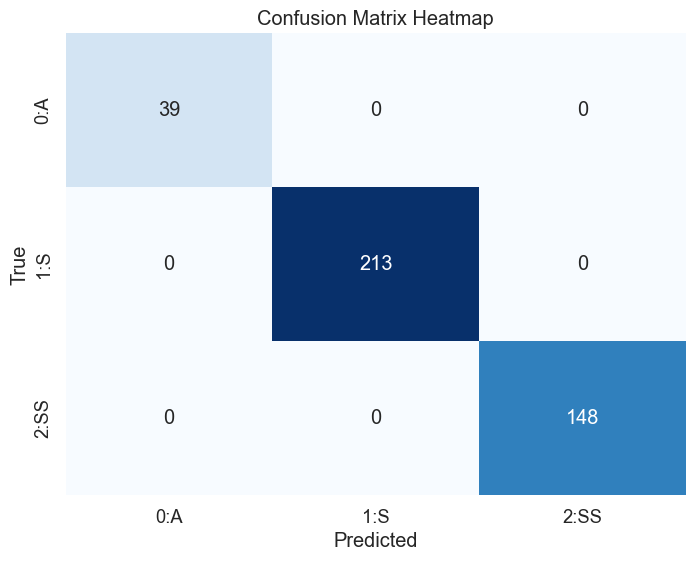

In [ ]:
# --- 3. Extra Trees --- #
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)
et_pred = et.predict(X_test)

et_accuracy = accuracy_score(et_pred, y_test)
et_report = classification_report(et_pred, y_test)
et_matrix = confusion_matrix(et_pred, y_test)
print('Accuracy of Extra Trees : ', round(et_accuracy, 3))
print('Classification report of Extra Trees : \n', et_report)
print('Confusion Matrix of Extra Trees : \n', et_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(et_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Decision Tree :  1.0
Classification report of Decision Tree : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Decision Tree : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


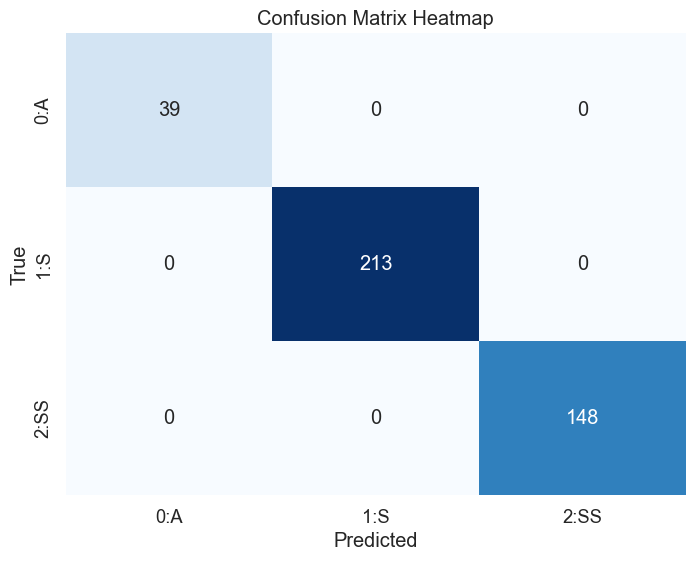

In [ ]:
# --- 4. Decision Tree --- #

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_accuracy = accuracy_score(dt_pred, y_test)
dt_report = classification_report(dt_pred, y_test)
dt_matrix = confusion_matrix(dt_pred, y_test)
print('Accuracy of Decision Tree : ', round(dt_accuracy, 3))
print('Classification report of Decision Tree : \n', dt_report)
print('Confusion Matrix of Decision Tree : \n', dt_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(dt_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Support Vector Machine (SVM):  0.532
Classification report of SVM: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.53      0.69       400
           2       0.00      0.00      0.00         0

    accuracy                           0.53       400
   macro avg       0.33      0.18      0.23       400
weighted avg       1.00      0.53      0.69       400

Confusion Matrix of SVM: 
 [[  0   0   0]
 [ 39 213 148]
 [  0   0   0]]


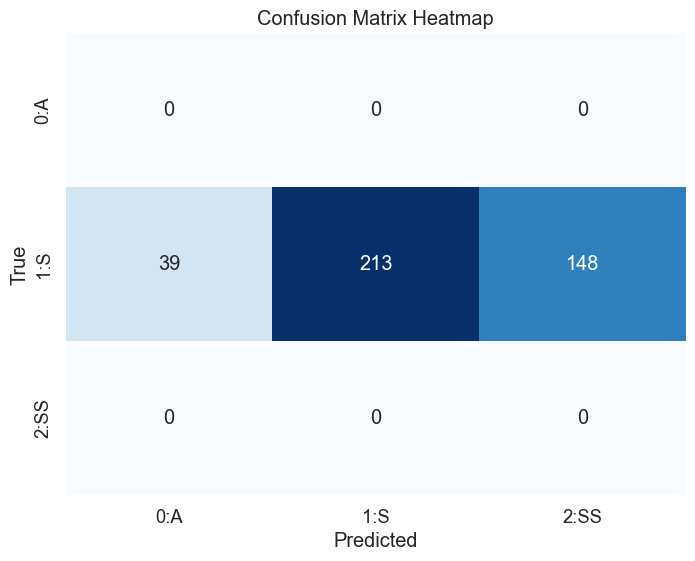

In [ ]:
# --- 5. Support Vector Machine (SVM) --- # (non-linear kernel, specifically the Radial Basis Function (RBF) kernel)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)  # Create an SVM classifier with a radial basis function kernel
svm.fit(X_train, y_train)  # Train the SVM model
svm_pred = svm.predict(X_test)  # Predict using the test set

svm_accuracy = accuracy_score(svm_pred, y_test)  # Calculate accuracy
svm_report = classification_report(svm_pred, y_test)  # Generate classification report
svm_matrix = confusion_matrix(svm_pred, y_test)  # Generate confusion matrix

print('Accuracy of Support Vector Machine (SVM): ', round(svm_accuracy, 3))
print('Classification report of SVM: \n', svm_report)
print('Confusion Matrix of SVM: \n', svm_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(svm_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
# Linear SVM has 2 approaches below, the 1st one best for small datasets like in this case with just 2000 rows

#The differences in accuracy between the two code snippets likely arise from the different methods used in constructing the SVM models.
#In the first code snippet, you're using SVC(kernel="linear") which specifies a linear kernel for the Support Vector Machine (SVM). This kernel is used for solving linear classification problems. It's effective when the data can be separated linearly.
#However, in the second code snippet, LinearSVC() is used. This is another way to create a linear SVM classifier, but it behaves differently from SVC(kernel="linear") in terms of optimization algorithms and loss functions. LinearSVC() is optimized for linear problems and can scale better to larger datasets.
#The results indicate that the first approach, using SVC(kernel="linear"), performs better. It's achieving higher accuracy and generating a more coherent classification report and confusion matrix.

Accuracy of Linear SVC Classifier :  1.0
Classification report of Linear SVC Classifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Linear SVC Classifier : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


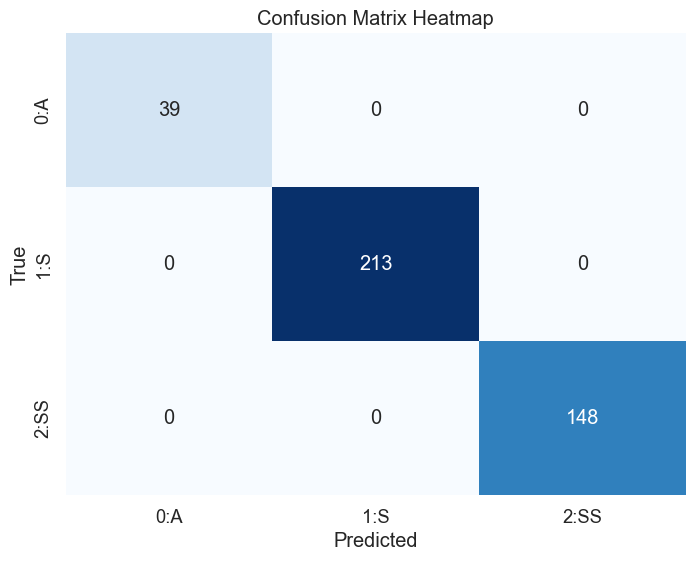

In [ ]:
# --- 6. Method 1: Linear Support Vector Machine (SVM) --- #  with a linear kernel (LinearSVC)

from sklearn.svm import SVC

# Create the Linear SVC Classifier
svc = SVC(kernel="linear")

# Fit the model
svc.fit(X_train, y_train)

# Make predictions
svc_pred = svc.predict(X_test)

# Calculate metrics
svc_accuracy = accuracy_score(svc_pred, y_test)
svc_report = classification_report(svc_pred, y_test)
svm1_matrix = confusion_matrix(svc_pred, y_test)

# Print the results
print('Accuracy of Linear SVC Classifier : ', round(svc_accuracy, 3))
print('Classification report of Linear SVC Classifier : \n', svc_report)
print('Confusion Matrix of Linear SVC Classifier : \n', svm1_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(svm1_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

Accuracy of SVM :  0.63
Classification report of SVM : 
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        48
           1       1.00      0.61      0.75       352
           2       0.00      0.00      0.00         0

    accuracy                           0.63       400
   macro avg       0.67      0.47      0.55       400
weighted avg       1.00      0.63      0.77       400

Confusion Matrix of SVM :
 [[ 39   0   9]
 [  0 213 139]
 [  0   0   0]]


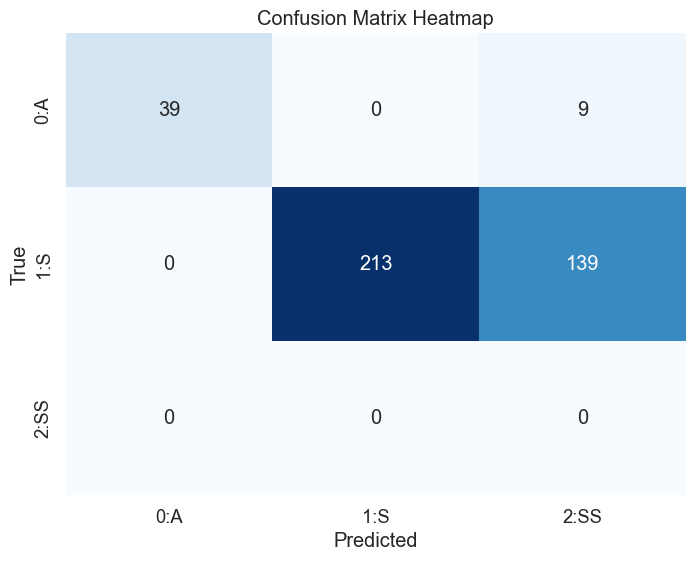

In [ ]:
# --- 6. Method 2: Linear Support Vector Machine (SVM) --- #  classifier with LinearSVC()

svr = LinearSVC()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)


#a Support Vector Machine (SVM) classifier with a linear kernel (LinearSVC) is trained and tested using the following steps:
#svr = LinearSVC(): An instance of the LinearSVC classifier is created.

#svr.fit(X_train, y_train): The LinearSVC classifier is trained on the training data (X_train and y_train).
#This step involves finding the hyperplane that best separates the data points of different classes while maximizing the margin
#between them.

#svr_pred = svr.predict(X_test): The trained SVM classifier is used to make predictions on the test data (X_test).
#These predictions are stored in the svr_pred variable.

svr_accuracy = accuracy_score(svr_pred, y_test)
svr_report = classification_report(svr_pred, y_test)
svm2_matrix = confusion_matrix(svr_pred, y_test)
print('Accuracy of Linear SVM : ', round(svr_accuracy, 3))
print('Classification report of SVM : \n', svr_report)
print('Confusion Matrix of SVM :\n', svm2_matrix)


#svr_accuracy = accuracy_score(svr_pred, y_test): The accuracy of the SVM classifier's predictions on the test data (svr_pred)
#is calculated by comparing them to the true labels (y_test). The result is stored in the svr_accuracy variable.

#svr_report = classification_report(svr_pred, y_test): The classification_report function is used to generate a detailed
#classification report, including metrics such as precision, recall, F1-score, and support for each class.
#This report is stored in the svr_report variable.

#svr_matrix = confusion_matrix(svr_pred, y_test): The confusion matrix is computed based on the predictions (svr_pred) and
#true labels (y_test). The confusion matrix provides information about the number of true positive, true negative,
#false positive, and false negative predictions. It is stored in the svr_matrix variable.

#Finally, the results are printed using print statements:

#The accuracy of the SVM classifier is printed with a rounded value.
#The classification report, which includes precision, recall, F1-score, and support for each class, is printed.
#The confusion matrix, which shows the distribution of true and false predictions, is printed.
#These metrics help evaluate the performance of the SVM classifier in terms of its ability to correctly classify data points into different classes.

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(svm2_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

Accuracy of Gradient Boosting Classifier :  1.0
Classification report of Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Gradient Boosting Classifier : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


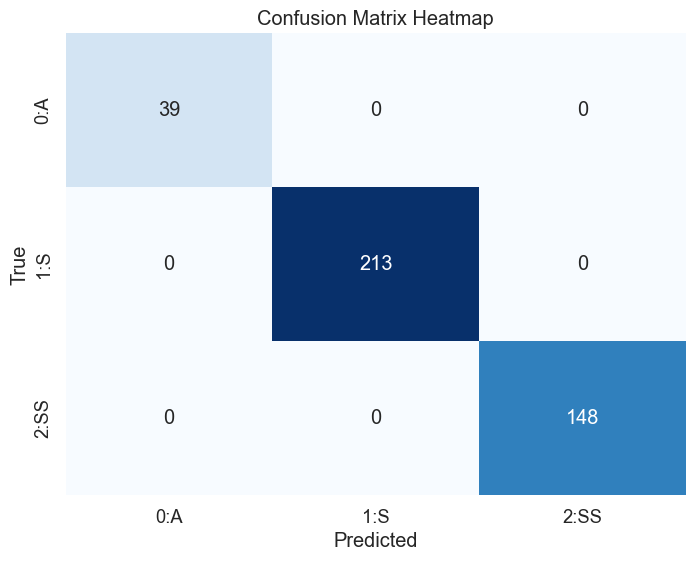

In [ ]:
# --- 7. Gradient Boosting Classifier --- #
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

gb_accuracy = accuracy_score(gb_pred, y_test)
gb_report = classification_report(gb_pred, y_test)
gb_matrix = confusion_matrix(gb_pred, y_test)
print('Accuracy of Gradient Boosting Classifier : ', round(gb_accuracy, 3))
print('Classification report of Gradient Boosting Classifier : \n', gb_report)
print('Confusion Matrix of Gradient Boosting Classifier : \n', gb_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of K-Nearest Neighbors (KNN) :  1.0
Classification report of K-Nearest Neighbors (KNN) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of K-Nearest Neighbors (KNN) : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


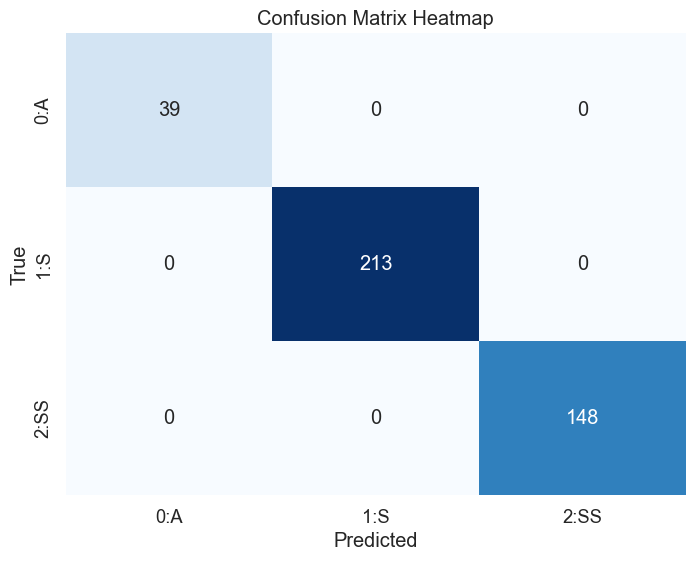

In [ ]:
# --- 8. K-Nearest Neighbors (KNN) --- #
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (5 is used as an example)

# Train the KNN model
knn.fit(X_train, y_train)

# Predict using the trained KNN model
knn_pred = knn.predict(X_test)

# Calculate accuracy and other evaluation metrics
knn_accuracy = accuracy_score(knn_pred, y_test)
knn_report = classification_report(knn_pred, y_test)
knn_matrix = confusion_matrix(knn_pred, y_test)

# Print evaluation results
print('Accuracy of K-Nearest Neighbors (KNN) : ', round(knn_accuracy, 3))
print('Classification report of K-Nearest Neighbors (KNN) : \n', knn_report)
print('Confusion Matrix of K-Nearest Neighbors (KNN) : \n', knn_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Logistic Regression: 1.0
Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Logistic Regression:
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


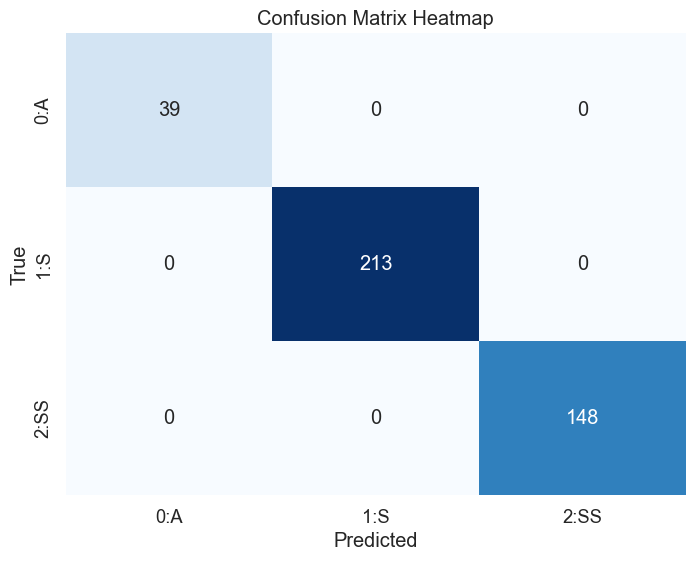

In [ ]:
# --- 9. Logistic Regression --- #
from sklearn.linear_model import LogisticRegression

# Assuming df2 contains the encoded data and labels (X and y defined as before)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Initialize and train the Logistic Regression model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

# Predict using the trained model
lr_pred = logistic_regression.predict(X_test)

# Calculate metrics and display results
lr_accuracy = accuracy_score(lr_pred, y_test)
lr_report = classification_report(lr_pred, y_test)
lr_matrix = confusion_matrix(lr_pred, y_test)

print('Accuracy of Logistic Regression:', round(lr_accuracy, 3))
print('Classification report of Logistic Regression:\n', lr_report)
print('Confusion Matrix of Logistic Regression:\n', lr_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Neural Network :  0.872
Classification report of Neural Network : 
               precision    recall  f1-score   support

           0       0.18      0.58      0.27        12
           1       1.00      0.94      0.97       227
           2       0.87      0.80      0.83       161

    accuracy                           0.87       400
   macro avg       0.68      0.77      0.69       400
weighted avg       0.92      0.87      0.89       400

Confusion Matrix of Neural Network : 
 [[  7   0   5]
 [  0 213  14]
 [ 32   0 129]]


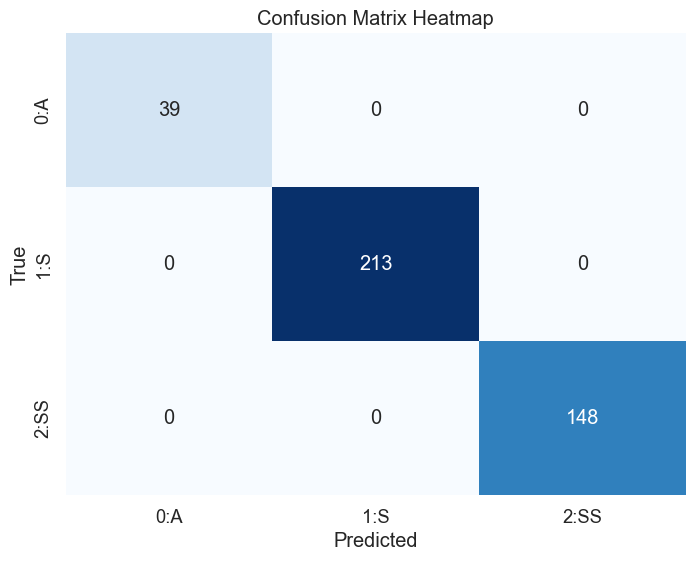

In [ ]:
# --- 10. Neural Networks --- #

from sklearn.neural_network import MLPClassifier

# Initialize the neural network classifier
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Train the neural network classifier
nn.fit(X_train, y_train)
nn_pred = nn.predict(X_test)

# Obtain accuracy, classification report, and confusion matrix
nn_accuracy = accuracy_score(nn_pred, y_test)
nn_report = classification_report(nn_pred, y_test)
nn_matrix = confusion_matrix(nn_pred, y_test)

# Print results
print('Accuracy of Neural Network : ', round(nn_accuracy, 3))
print('Classification report of Neural Network : \n', nn_report)
print('Confusion Matrix of Neural Network : \n', nn_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [ ]:
# --- LightGBM --- #
#pip install lightgbm
#import lightgbm as lgb

#lgb_model = lgb.LGBMClassifier()
#lgb_model.fit(X_train, y_train)
#lgb_pred = lgb_model.predict(X_test)

#lgb_accuracy = accuracy_score(lgb_pred, y_test)
#lgb_report = classification_report(lgb_pred, y_test)
#lgb_matrix = confusion_matrix(lgb_pred, y_test)
#print('Accuracy of LightGBM : ', round(lgb_accuracy, 3))
#print('Classification report of LightGBM : \n', lgb_report)
#print('Confusion Matrix of LightGBM : \n', lgb_matrix)


Accuracy of Naive Bayes :  1.0
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Naive Bayes : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


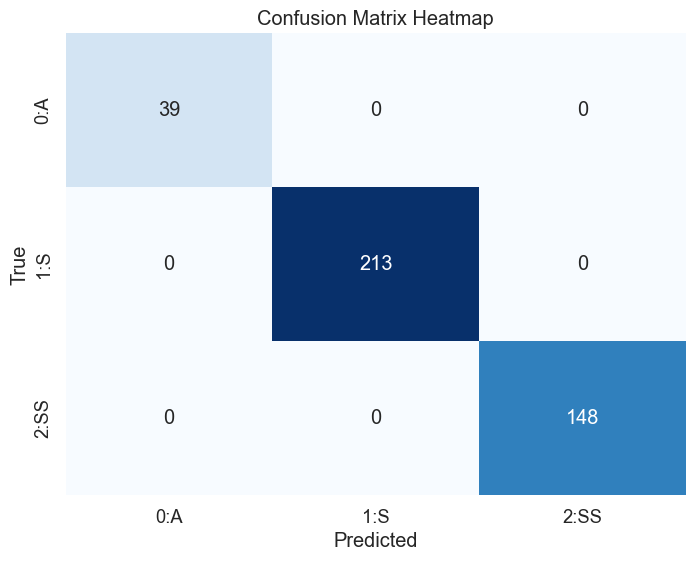

In [ ]:
# --- 11. Naive Bayes Algorithm (NB) --- #
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test)
nb_matrix = confusion_matrix(nb_pred, y_test)
print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', nb_report)
print('Confusion Matrix of Naive Bayes : \n', nb_matrix)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(nb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()


Accuracy of Naive Bayes :  1.0
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix of Naive Bayes :
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]


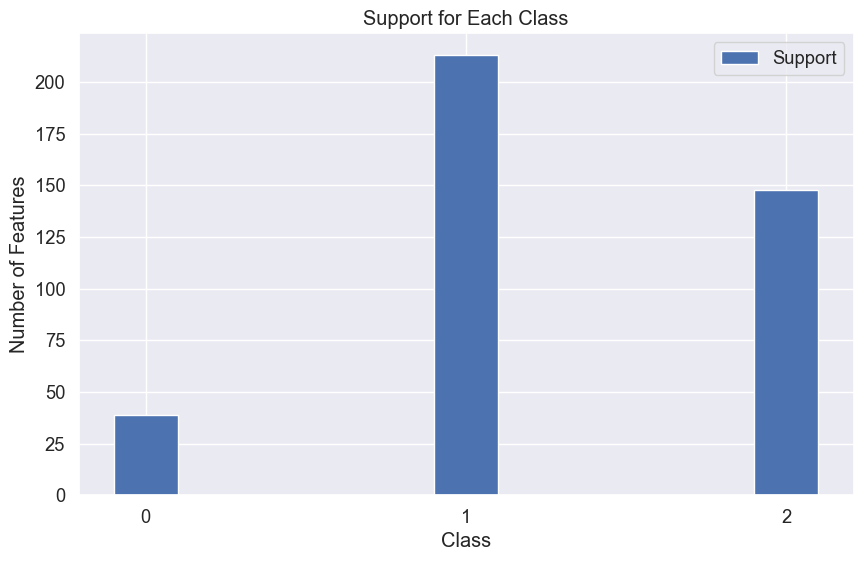

Accuracy of Naive Bayes :  1.0
Classification report of Naive Bayes : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



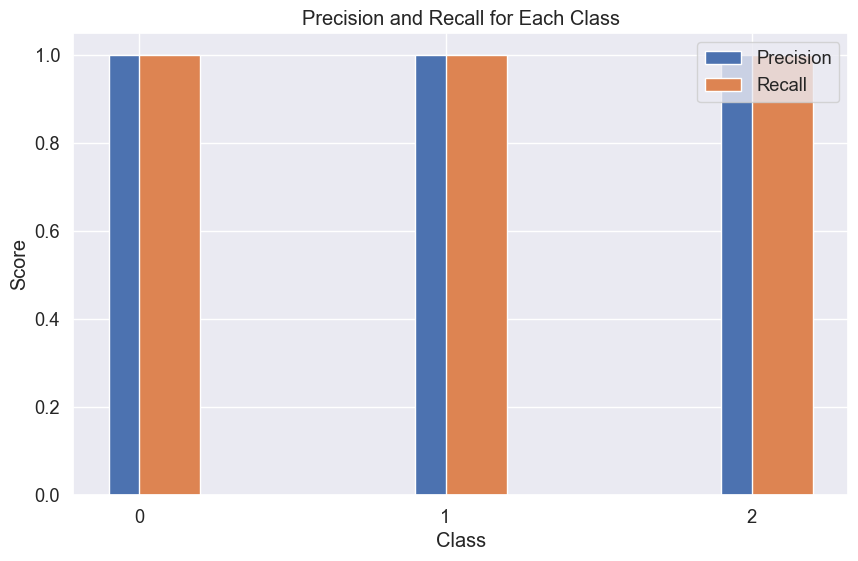

In [ ]:
# Assuming you already have nb_pred and y_test defined
nb_accuracy = accuracy_score(nb_pred, y_test)
nb_report = classification_report(nb_pred, y_test, output_dict=True)  # Use output_dict=True to get metrics as a dictionary
nb_matrix = confusion_matrix(nb_pred, y_test)


# Extract support for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
support = [nb_report[label]['support'] if label in nb_report else 0 for label in labels]

print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))
print('Confusion Matrix of Naive Bayes :\n', nb_matrix)

# Plot support
plt.figure(figsize=(10, 6))
plt.bar(labels, support, width=0.2, label='Support', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Features')
plt.xticks(labels)
plt.legend()
plt.title('Support for Each Class')
plt.show()



# Extract precision and recall for all classes
labels = [str(label) for label in np.unique(np.concatenate((nb_pred, y_test)))]  # Get all unique labels
precision = [nb_report[label]['precision'] if label in nb_report else 0.0 for label in labels]
recall = [nb_report[label]['recall'] if label in nb_report else 0.0 for label in labels]

print('Accuracy of Naive Bayes : ', round(nb_accuracy, 3))
print('Classification report of Naive Bayes : \n', classification_report(nb_pred, y_test))

# Plot precision and recall
plt.figure(figsize=(10, 6))
plt.bar(labels, precision, width=0.2, label='Precision', align='center')
plt.bar(labels, recall, width=0.2, label='Recall', align='edge')

plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(labels)
plt.legend()
plt.title('Precision and Recall for Each Class')
plt.show()


In [ ]:
# --- 12. Ensemble Learning --- #

# The weakest algorithms (2nd & 3rd best accuracy (even if it's another 100% accuracy, just add it))
estimators = [
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=42)),
    ('svr', LinearSVC(random_state=42))
]
# Blender, your best algorithms with accuracy (100% for example) after final_estimator. Thus, GaussianNB is the most accurate.
# If you wanted to select one of the other algorithms who also scored 100% for your blender, you could have.
clf = StackingClassifier(
    estimators=estimators, final_estimator=GaussianNB())



#In this code snippet, a Stacking Classifier (clf) is defined using scikit-learn's StackingClassifier.
#Stacking is an ensemble learning method that combines multiple base estimators to improve predictive performance.

#Here's a breakdown of the code:

#estimators: This is a list of tuples, where each tuple contains the name of the estimator and the estimator object.
#Two base estimators are defined:

#'rf': A Random Forest Classifier with 1000 estimators and a random seed of 42.
#'svr': A Linear Support Vector Classifier (LinearSVC) with a random seed of 42.
#clf: The Stacking Classifier is created using the StackingClassifier class. It takes two main parameters:

#estimators: This parameter receives the list of base estimators defined earlier.
#final_estimator: This parameter specifies the meta-estimator that combines the predictions from the base estimators.
#In this case, a Gaussian Naive Bayes (GaussianNB) classifier is used as the final estimator.
#The Stacking Classifier combines the predictions of the base classifiers ('rf' and 'svr') using the final estimator (GaussianNB)
#This ensemble method can often improve classification performance by leveraging the strengths of multiple classifiers.

In [ ]:
#Train your Ensemble Algorithm

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)

#In this code snippet, the Stacking Classifier (clf) is trained on the training data (X_train and y_train) using the fit method. After training, the classifier is used to make predictions on the test data (X_test) using the predict method. Finally, the accuracy of the predictions is calculated using scikit-learn's accuracy_score function and stored in the variable accuracy.

#The code essentially performs the following steps:

#Trains the Stacking Classifier (clf) using the training data.
#Uses the trained classifier to predict the target labels for the test data.
#Calculates the accuracy of the predictions by comparing them to the true labels (y_test).
#The accuracy variable will contain the accuracy score of the Stacking Classifier's predictions on the test data.
#This score measures how well the classifier performed in terms of correctly classifying the data points in the test set.

Accuracy of Ensemble Model :  1.0
Confusion Matrix of Ensemble Model :  [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]
Classification Report of Ensemble Model :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy of Ensemble Model :  1.0
Confusion Matrix of Ensemble Model : 
 [[ 39   0   0]
 [  0 213   0]
 [  0   0 148]]
Classification Report of Ensemble Model :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00       213
           2       1.00      1.00      1.00       148

    accuracy                           1.00       400
   macro avg       1.00  

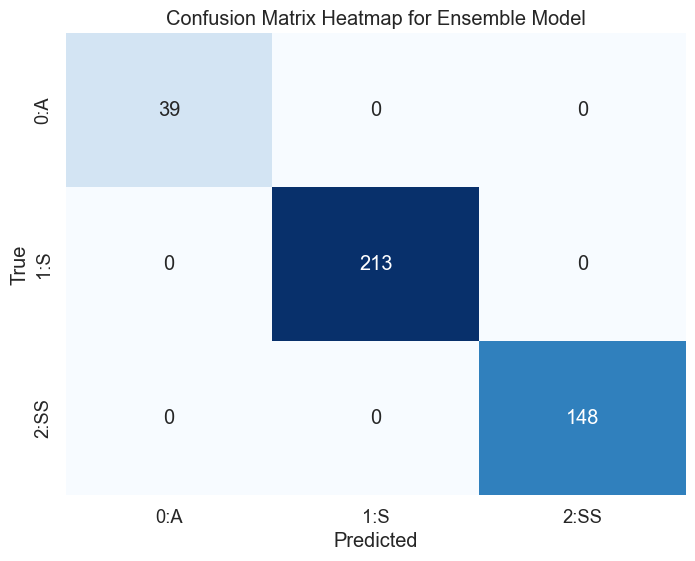

In [ ]:
eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : ', eb_matrix)
print('Classification Report of Ensemble Model :', eb_report)


#In this code snippet, the accuracy, confusion matrix, and classification report for the ensemble model (clf) are evaluated
#and printed.

#Here's what each part of the code does:

#eb_accuracy: Calculates the accuracy of the ensemble model's predictions by comparing them to the true labels (y_test)
#using the accuracy_score function.
#eb_matrix: Computes the confusion matrix for the ensemble model's predictions using the confusion_matrix function.
#The confusion matrix provides information about the true positives, true negatives, false positives, and false negatives.
#eb_report: Generates a classification report for the ensemble model's predictions using the classification_report function.
#The classification report includes metrics such as precision, recall, F1-score, and support for each class.
#Finally, the code prints out the accuracy, confusion matrix, and classification report for the ensemble model.
#These metrics provide insights into the model's performance in terms of classification accuracy and the ability to correctly
#classify different classes.

# Assuming you already have pred and y_test defined for your Ensemble Model

eb_accuracy = accuracy_score(pred, y_test)
eb_matrix = confusion_matrix(pred, y_test)
eb_report = classification_report(pred, y_test)

print('Accuracy of Ensemble Model : ', round(eb_accuracy, 3))
print('Confusion Matrix of Ensemble Model : \n', eb_matrix)
print('Classification Report of Ensemble Model :\n', eb_report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size for better readability
sns.heatmap(eb_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0:A", "1:S", "2:SS"], yticklabels=["0:A", "1:S", "2:SS"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap for Ensemble Model")
plt.show()

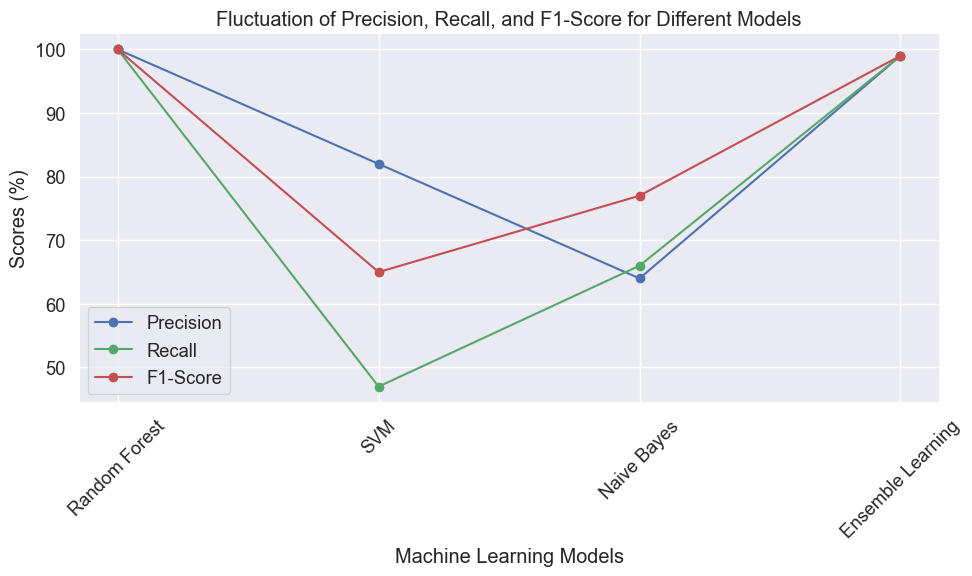

In [ ]:
#Plot the evaluation metrics of each model in one figure

# These values are made up and DO NOT match the outputs above, just for understanding -> please manually input the correct numbers
# for the Precision, Recall, F1 etc as outputted above for each algorithm


# Model names
models = ['Random Forest', 'SVM', 'Naive Bayes', 'Ensemble Learning']

# Precision scores
precision = [100, 82, 64, 99]  #examples - pls input the correct in exam based on your output above

# Recall scores
recall = [100, 47, 66, 99]  #examples

# F1-score scores
f1_score = [100, 65, 77, 99]  #examples

# X-axis values (models)
x = range(len(models))

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot precision scores
ax.plot(x, precision, marker='o', linestyle='-', color='b', label='Precision')

# Plot recall scores
ax.plot(x, recall, marker='o', linestyle='-', color='g', label='Recall')

# Plot F1-score scores
ax.plot(x, f1_score, marker='o', linestyle='-', color='r', label='F1-Score')

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.set_xlabel('Machine Learning Models')

# Set y-axis label
ax.set_ylabel('Scores (%)')

# Set plot title
ax.set_title('Fluctuation of Precision, Recall, and F1-Score for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()

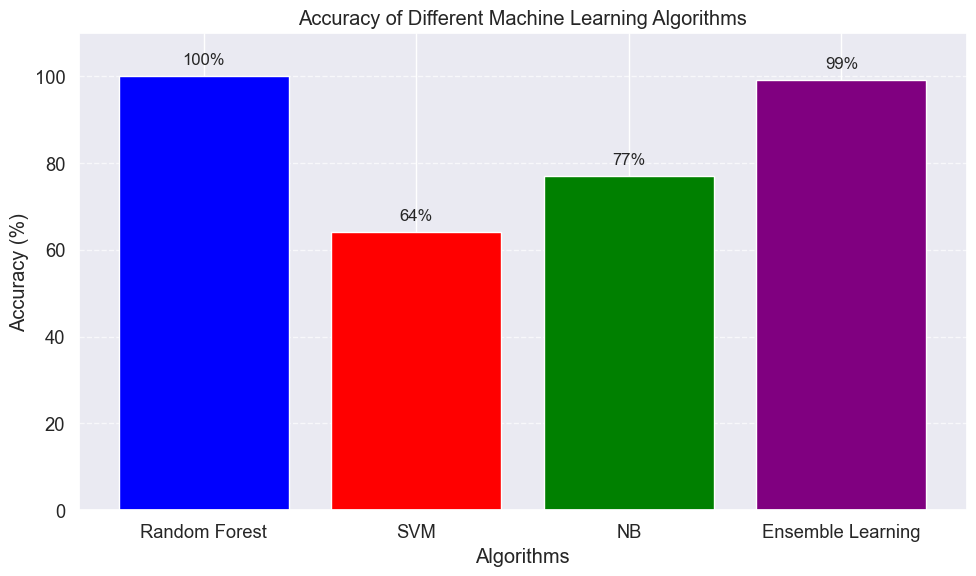

In [ ]:
# Define the algorithms and their corresponding accuracies
algorithms = ['Random Forest', 'SVM', 'NB', 'Ensemble Learning']
accuracies = [100, 64, 77, 99] #examples

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'red', 'green', 'purple'])
plt.ylim(0, 110)  # Set the y-axis limit for better visualization
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Machine Learning Algorithms')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 2, str(v) + '%', ha='center', va='bottom', fontsize=12)

# Show the graph
plt.tight_layout()
plt.show()



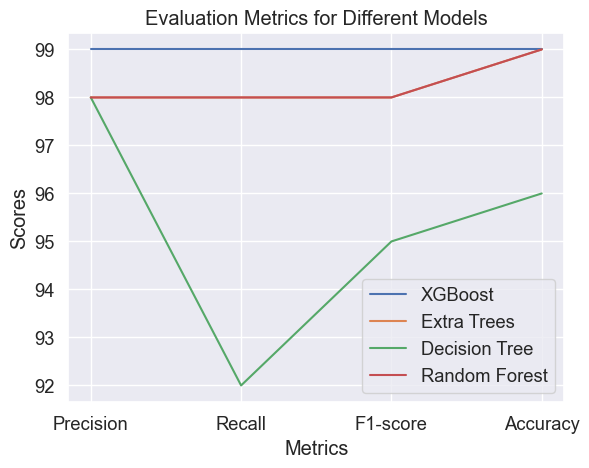

In [ ]:
# Evaluation metrics for XGBoost
xgboost_precision = 99
xgboost_recall = 99
xgboost_f1_score = 99
xgboost_accuracy = 99

# Evaluation metrics for Extra Trees
extra_trees_precision = 98
extra_trees_recall = 98
extra_trees_f1_score = 98
extra_trees_accuracy = 99

# Evaluation metrics for Decision Tree
decision_tree_precision = 98
decision_tree_recall = 92
decision_tree_f1_score = 95
decision_tree_accuracy = 96

# Evaluation metrics for Random Forest
random_forest_precision = 98
random_forest_recall = 98
random_forest_f1_score = 98
random_forest_accuracy = 99

# Plotting the evaluation metrics
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
xgboost_scores = [xgboost_precision, xgboost_recall, xgboost_f1_score, xgboost_accuracy]
extra_trees_scores = [extra_trees_precision, extra_trees_recall, extra_trees_f1_score, extra_trees_accuracy]
decision_tree_scores = [decision_tree_precision, decision_tree_recall, decision_tree_f1_score, decision_tree_accuracy]
random_forest_scores = [random_forest_precision, random_forest_recall, random_forest_f1_score, random_forest_accuracy]

plt.plot(metrics, xgboost_scores, label='XGBoost')
plt.plot(metrics, extra_trees_scores, label='Extra Trees')
plt.plot(metrics, decision_tree_scores, label='Decision Tree')
plt.plot(metrics, random_forest_scores, label='Random Forest')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Models')
plt.legend()
plt.show()

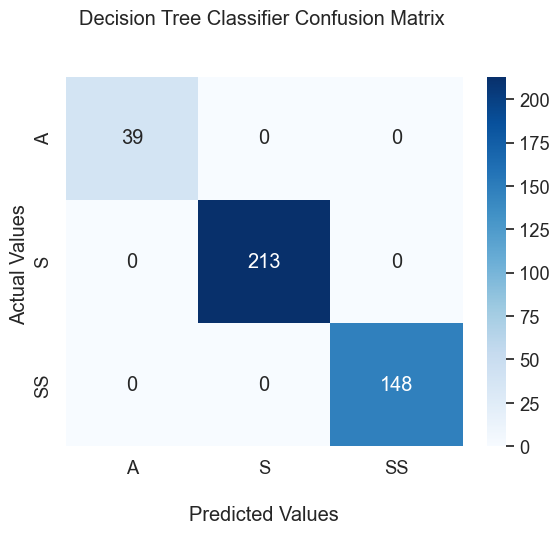

Decision Tree Classifier
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000       213
           2     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       400
   macro avg     1.0000    1.0000    1.0000       400
weighted avg     1.0000    1.0000    1.0000       400



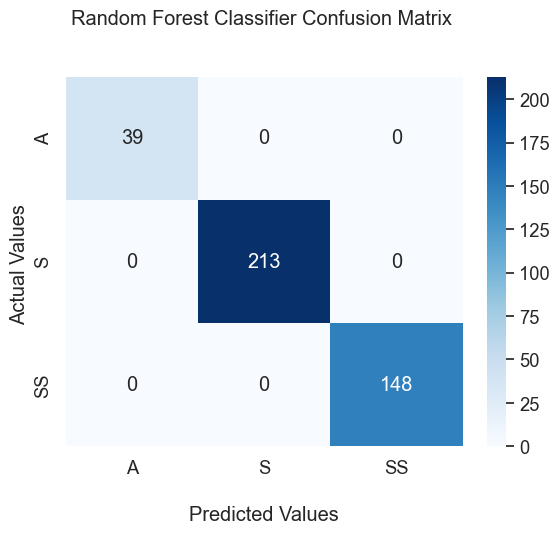

Random Forest Classifier
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000       213
           2     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       400
   macro avg     1.0000    1.0000    1.0000       400
weighted avg     1.0000    1.0000    1.0000       400



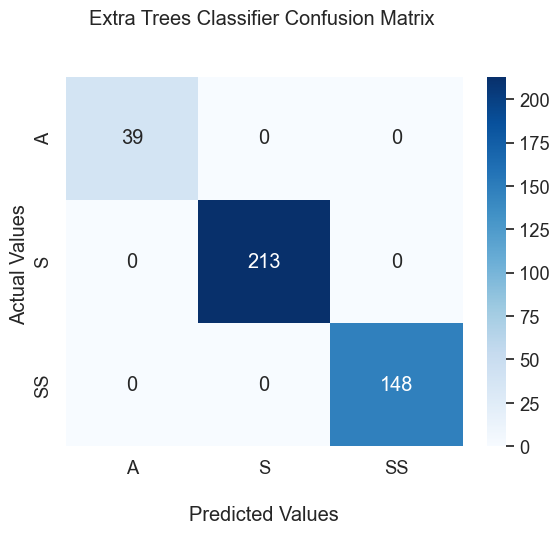

Extra Trees Classifier
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000       213
           2     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       400
   macro avg     1.0000    1.0000    1.0000       400
weighted avg     1.0000    1.0000    1.0000       400



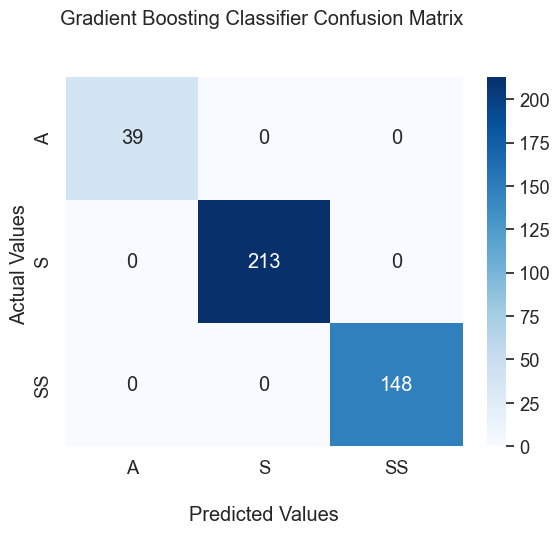

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000       213
           2     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       400
   macro avg     1.0000    1.0000    1.0000       400
weighted avg     1.0000    1.0000    1.0000       400



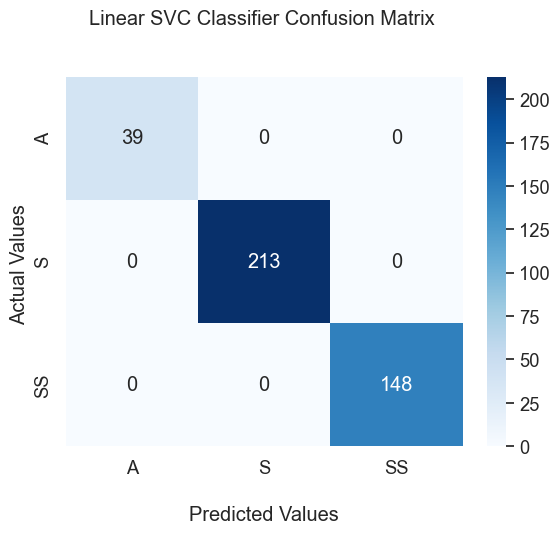

Linear SVC Classifier
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000       213
           2     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       400
   macro avg     1.0000    1.0000    1.0000       400
weighted avg     1.0000    1.0000    1.0000       400



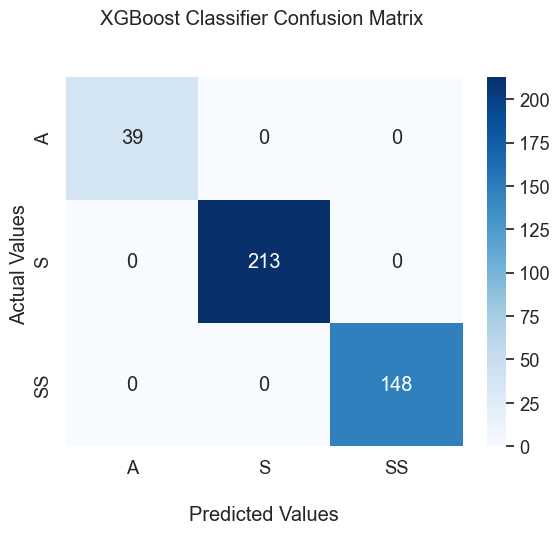

XGBoost Classifier
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        39
           1     1.0000    1.0000    1.0000       213
           2     1.0000    1.0000    1.0000       148

    accuracy                         1.0000       400
   macro avg     1.0000    1.0000    1.0000       400
weighted avg     1.0000    1.0000    1.0000       400



ValueError: Found input variables with inconsistent numbers of samples: [400, 1600]

In [ ]:
# --- ANOTHER WAY WITH SOME OF THE ALGORITHMS + HEAT MAPS at once --- #

from sklearn.metrics import confusion_matrix, classification_report


# Initialize a list of classifier names and corresponding classifiers
names = [
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Extra Trees Classifier",
    "Gradient Boosting Classifier",
    "Linear SVC Classifier",
    "XGBoost Classifier"
]

classifiers = [
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=9, n_estimators=100, max_features=1),
    ExtraTreesClassifier(n_estimators=20),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    SVC(kernel="linear"),
    XGBClassifier()
]


# Loop through classifiers, fit them, and print classification reports and confusion matrices
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, digits=4)

    confusion = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
    ax.set_title(name + ' Confusion Matrix \n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['A', 'S', 'SS'])
    ax.yaxis.set_ticklabels(['A', 'S', 'SS'])

    # Display the visualization of the Confusion Matrix.
    plt.show()

    print(name)
    print(report)


# Assuming y_test and y_pred are defined and contain the actual and predicted labels

confusion = confusion_matrix(y_test, y_train)
ax = sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
ax.set_title('Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['A', 'S', 'SS'])
ax.yaxis.set_ticklabels(['A', 'S', 'SS'])

# Display the visualization of the Confusion Matrix.
plt.show()


# For Multinomial NB, apply MinMaxScaler to handle non-negative values
X = df[features].values
sc = MinMaxScaler()
scaler = sc.fit(X)
X = scaler.transform(X)

# Split the data into training and testing sets
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.20)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = metrics.confusion_matrix(y_test, y_train)
ax = sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
ax.set_title('Multinomial NB Confusion Matrix \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['A', 'S', 'SS'])
ax.yaxis.set_ticklabels(['A', 'S', 'SS'])

# Display the visualization of the Confusion Matrix.
plt.show()